# Predicting Pulsars

This project exists for multiple reasons. I am:
- endlessly fascinated by the frontier of space
- actively sharpening my data science and machine learning skills
- shamelessly trying to impress potential employers

So I dug around in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) in hopes to find a sane, vetted, and clean dataset so I can focus on exploring. This led me to the HTRU2 data set.

## What's HTRU2?

The HTRU2 data set is a sample collected from the [High Time Resolution Universe Pulsar Survey](https://academic.oup.com/mnras/article/409/2/619/1037409)[^1] which describes possible pulsar candidates.

## Slow down. Pulsar candidates?

Pulsars are some insane celestial bodies. Take a star at least four to eight times more massive than our sun that, at the end of its life, violently explodes into a supernova. This brilliant explosion sheds its outer layers into a beautiful super nova and leaves behind an impossibly dense sphere only 12 miles across. A teaspoon of this stellar mass would weigh a billion tons. It could spin up to 43,000 revolutions per minute while emitting electromagnetic radiation. Some certain neutron stars may also happen to be highly magnetized, which would emit more of a beam. If this spinning beam crosses earth during its rotation, we'd detect a highly regular pattern of radio waves emitting from its point in our sky.

It's these patterns that the High Time Resolution Universe Pulsar Survey works to detect. Unfortunately, the radio signals picked up tend to be very noisy, and it takes a lot of time and resources to have humans annotate and verify all this data. So we're using machine learning to help aid in the process of annotation, to ease up the workload placed on the silly humans.


## What's in HTRU2?

For the specifics, it has attributes that describe x, y, and z. Note that it does not contain any positional or astronomical data, as these features are derived from the PulsarFeatureLab [citation needed]. It contains 17,898 total examples, consisting of 1,639 positive examples and 16,259 negative examples. This set was verified and annotated by humans.

According to the No Free Lunch theorem, I'm actively not going to dig into what the features are or why they were chosen. I will make one big assumption: that all this data is labeled / classified correctly and accurately. Besides that, I will not make any other assumptions just so I can mitigate any bias that I have toward what algorithms will and won't work. Let's let the data speak for itself.


## So what are you doing?

I'm going to
- explore the data using descriptive statistics to get an understanding of the data
- run some initial algorithms to get a baseline performance indication
- possibly do some feature engineering to see if we can optimize the data better for the algorithms
- select the best performing algorithm
- optimize the algorithm for better performance

## The process

I'm using the Scientific Python tech stack.

We'll start by loading up some standard scipy libraries and the data itself. I'll have it print out the shape (rows, columns) as a sanity check.

In [1]:
# Load CSV using Pandas
from urllib.request import urlopen
from pandas import read_csv


filename = 'data/HTRU_2.csv'
names = ['prf_mean', 'prf_stddev', 'prf_krt', 'prf_skw', 'crv_mean', 'crv_stddev', 'crv_krt', 'crv_skw', 'class']
data = read_csv(filename, names=names, header=None)
print(data.shape)

(17898, 9)


Let's look at the data directly. Here are the first 20 rows:

In [2]:
peek = data.head(20)
print(peek)

      prf_mean  prf_stddev   prf_krt   prf_skw   crv_mean  crv_stddev  \
0   140.562500   55.683782 -0.234571 -0.699648   3.199833   19.110426   
1   102.507812   58.882430  0.465318 -0.515088   1.677258   14.860146   
2   103.015625   39.341649  0.323328  1.051164   3.121237   21.744669   
3   136.750000   57.178449 -0.068415 -0.636238   3.642977   20.959280   
4    88.726562   40.672225  0.600866  1.123492   1.178930   11.468720   
5    93.570312   46.698114  0.531905  0.416721   1.636288   14.545074   
6   119.484375   48.765059  0.031460 -0.112168   0.999164    9.279612   
7   130.382812   39.844056 -0.158323  0.389540   1.220736   14.378941   
8   107.250000   52.627078  0.452688  0.170347   2.331940   14.486853   
9   107.257812   39.496488  0.465882  1.162877   4.079431   24.980418   
10  142.078125   45.288073 -0.320328  0.283953   5.376254   29.009897   
11  133.257812   44.058244 -0.081060  0.115362   1.632107   12.007806   
12  134.960938   49.554327 -0.135304 -0.080470  10.

As another sanity check, let's check out the attribute data types to make sure we're dealing with just numerical data:

In [3]:
types = data.dtypes
print(types)

prf_mean      float64
prf_stddev    float64
prf_krt       float64
prf_skw       float64
crv_mean      float64
crv_stddev    float64
crv_krt       float64
crv_skw       float64
class           int64
dtype: object


Looking good so far. Each of these attributes are descriptive statistics themselves, but let's get super meta and pull some of our own descriptive stats from these descriptive stats. Dawg.

In [4]:
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print(description)

        prf_mean  prf_stddev    prf_krt    prf_skw   crv_mean  crv_stddev    crv_krt    crv_skw  \
count  17898.000   17898.000  17898.000  17898.000  17898.000   17898.000  17898.000  17898.000   
mean     111.080      46.550      0.478      1.770     12.614      26.327      8.304    104.858   
std       25.653       6.843      1.064      6.168     29.473      19.471      4.506    106.515   
min        5.812      24.772     -1.876     -1.792      0.213       7.370     -3.139     -1.977   
25%      100.930      42.376      0.027     -0.189      1.923      14.437      5.782     34.961   
50%      115.078      46.947      0.223      0.199      2.802      18.461      8.434     83.065   
75%      127.086      51.023      0.473      0.928      5.464      28.428     10.703    139.309   
max      192.617      98.779      8.070     68.102    223.392     110.642     34.540   1191.001   

           class  
count  17898.000  
mean       0.092  
std        0.288  
min        0.000  
25%        0.

Let's see this visually using histograms:

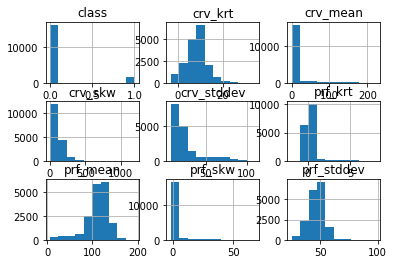

In [5]:
%matplotlib inline
from matplotlib import pyplot
data.hist()
pyplot.show()

Or another way, using density plots:

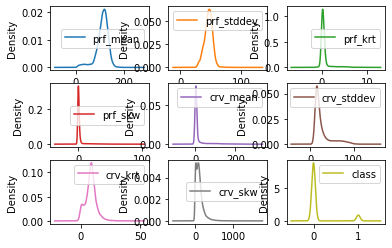

In [6]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

We can also use box-and-whisker plots to get an idea of where all the data lands:

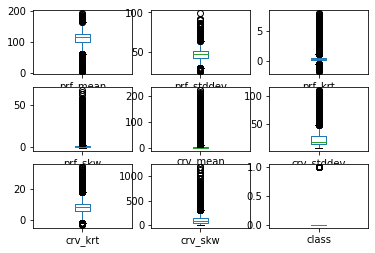

In [7]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

Let's also check how much the data is skewed away from bell curviness. Ideally these values are close to zero:

In [8]:
skew = data.skew()
print(skew)

prf_mean     -1.375
prf_stddev    0.127
prf_krt       3.638
prf_skw       5.181
crv_mean      3.683
crv_stddev    1.894
crv_krt       0.442
crv_skw       2.735
class         2.832
dtype: float64


These doubly-derived averages and standard deviations range from the tenths to the hundreds, which tells me that their magnitudes do vary but not wildly. Also, the visualization shows us how much of the data is Gaussian-like. Given what we're seeing, feature scaling is looking like a good option, since the machines tend to like more uniform data.

I'm also choosing not to do and feature engineering, since the raw attributes are already derived and cleaned.

The `class` plots tell us that the ratio of pulsars to not-pulsars isn't even. We'll verify this by displaying the class counts:

In [9]:
class_counts = data.groupby('class').size()
print(class_counts)

class
0    16259
1     1639
dtype: int64


This tells us we've got 10 negatives for every 1 positive. This feels like the data is borderline sparse, as ideally we should work with a 1:1 or 50/50 split. Let's see how the algorithms deal with this sparseness.

Next, let's see how the features relate to one another. The best case scenario, we find there is no correlation, meaning each attribute is independent. The machines like independent features.

Let's start with the numeric values, then visualize them.

In [10]:
correlations = data.corr(method='pearson')
print(correlations)

            prf_mean  prf_stddev  prf_krt  prf_skw  crv_mean  crv_stddev  crv_krt  crv_skw  class
prf_mean       1.000       0.547   -0.874   -0.739    -0.299      -0.307    0.234    0.144 -0.673
prf_stddev     0.547       1.000   -0.521   -0.540     0.007      -0.048    0.029    0.028 -0.364
prf_krt       -0.874      -0.521    1.000    0.946     0.414       0.433   -0.341   -0.214  0.792
prf_skw       -0.739      -0.540    0.946    1.000     0.412       0.415   -0.329   -0.205  0.710
crv_mean      -0.299       0.007    0.414    0.412     1.000       0.797   -0.616   -0.354  0.401
crv_stddev    -0.307      -0.048    0.433    0.415     0.797       1.000   -0.810   -0.576  0.492
crv_krt        0.234       0.029   -0.341   -0.329    -0.616      -0.810    1.000    0.924 -0.391
crv_skw        0.144       0.028   -0.214   -0.205    -0.354      -0.576    0.924    1.000 -0.259
class         -0.673      -0.364    0.792    0.710     0.401       0.492   -0.391   -0.259  1.000


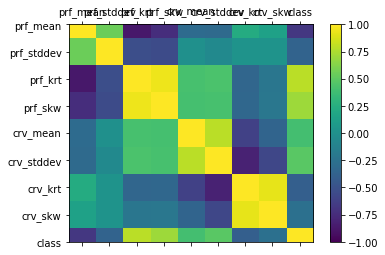

In [11]:
import numpy
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

Let's check the scatter plots to see these relationships with a bit more resolution.

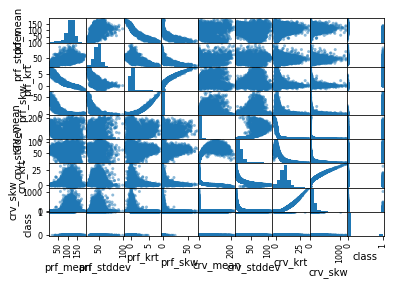

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
pyplot.show()

The plots show there's a pretty high positive correlation between the profile and curve means vs their standard deviations, as well as some high negative correlation between the kurtosis (sharpness of the bell curve peak) and the means. There's also some non-linear correlations, like crv_stddev vs crv_skew. Maybe we'll need to drop some features later, but let's see how the algorithms perform on the first pass.

## Time to Algorithm it up!

### Validation Dataset

We're gonna set aside 20% of the data. This means we'll train our algorithms on the other 80%, then we'll use the last 20% at the very end to see how our algorithms will perform on unseen data.

In [13]:
from sklearn.model_selection import train_test_split
array = data.values
X = array[:, 0:7]
Y = array[:, 8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Baseline Validation

We don't know what algorithms are going to work well yet. A good standard test harness uses 10-fold cross validation, using the `accuracy` metric for a quick idea how correct a given model is.

In [14]:
num_folds = 10
seed = 7
scoring = 'accuracy'

We will use a set of linear and non-linear algorithms to see which ones work well for this given problem:

In [18]:
# Spot-Check Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=2000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

Now we can compare algorithms, using just the default parameters. We'll calculate the mean and standard deviation accuracy for each algorithm, displaying both the numeric values and the visualization.

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.979047 (0.003170)
LDA: 0.974717 (0.003271)
KNN: 0.972762 (0.002898)
CART: 0.969200 (0.002107)
NB: 0.948387 (0.005590)
SVM: 0.972901 (0.003073)


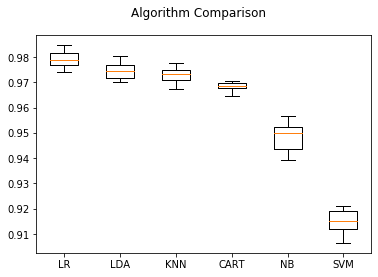

In [17]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

These distributions are generally tight and quite accurate. `Logistic Regression` looks easily like the most accurate algorithm, while `CART` seems to show very little variance, giving us confidence that it may do pretty well for unseen data.

### Standardize Data

Now we'll try scaling the data so that all of the features have more bellcurve-like distributions, which hopefully gives us better accuracy overall. Specifically, each attribute will have a mean of zero and a standard deviation of one.

We're also going to use pipelines so as to prevent data leakage across the tests.

In [21]:
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='lbfgs', max_iter=2000))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='scale'))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.978838 (0.003062)
ScaledLDA: 0.974717 (0.003271)
ScaledKNN: 0.979187 (0.002825)
ScaledCART: 0.968641 (0.003103)
ScaledNB: 0.948387 (0.005590)
ScaledSVM: 0.978978 (0.002082)


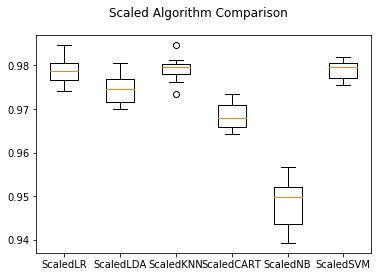

In [22]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

These results are interesting: feature scaling helped `SVM` immensely. By small margins, the top three algorhtms are now `ScaledKNN`, `ScaledSVM`, and `ScaledLR` in order. `ScaledSVM` has the tightest deviation, followed by `ScaledKNN` then `ScaledLR`. We'll focus on `KNN` and `SVM` - configuring beyond the default might even improve our results.

## Algorithm Tuning

### Tuning KNN

`KNN` uses 7 neighbors by default, but we'll try all odd values of *k* from 1 to 21.

In [23]:
# Tune scaled KNN
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.979257 using {'n_neighbors': 3}
0.972063 (0.002615) with: {'n_neighbors': 1}
0.979257 (0.002538) with: {'n_neighbors': 3}
0.979187 (0.002927) with: {'n_neighbors': 5}
0.979187 (0.002631) with: {'n_neighbors': 7}
0.978768 (0.002258) with: {'n_neighbors': 9}
0.978838 (0.002051) with: {'n_neighbors': 11}
0.978558 (0.001504) with: {'n_neighbors': 13}
0.978838 (0.002005) with: {'n_neighbors': 15}
0.978209 (0.002023) with: {'n_neighbors': 17}
0.978628 (0.002239) with: {'n_neighbors': 19}
0.978419 (0.002350) with: {'n_neighbors': 21}


Looks like the optimal configuration is `K=3`. This means the algorithm will be most accurate when comparing only its 3 nearest neighbors.

### Tuning SVM

`SVM` has two key parameters to tune: *C*, which is how much to relax the margin, and the `kernel` type.

In [24]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='scale')
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.979327 using {'C': 2.0, 'kernel': 'rbf'}
0.978698 (0.002815) with: {'C': 0.1, 'kernel': 'linear'}
0.973739 (0.003644) with: {'C': 0.1, 'kernel': 'poly'}
0.977651 (0.001977) with: {'C': 0.1, 'kernel': 'rbf'}
0.870722 (0.008812) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.978838 (0.003029) with: {'C': 0.3, 'kernel': 'linear'}
0.975276 (0.004157) with: {'C': 0.3, 'kernel': 'poly'}
0.978768 (0.001826) with: {'C': 0.3, 'kernel': 'rbf'}
0.869814 (0.009092) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.979047 (0.003185) with: {'C': 0.5, 'kernel': 'linear'}
0.976044 (0.004143) with: {'C': 0.5, 'kernel': 'poly'}
0.978628 (0.002099) with: {'C': 0.5, 'kernel': 'rbf'}
0.869675 (0.009016) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.979257 (0.003077) with: {'C': 0.7, 'kernel': 'linear'}
0.976463 (0.003963) with: {'C': 0.7, 'kernel': 'poly'}
0.978908 (0.001761) with: {'C': 0.7, 'kernel': 'rbf'}
0.869535 (0.008889) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.979257 (0.003029) with: {'C': 0.9, 'kernel': 'linear'

`SVM` shows its best accuracy of 97.933% (0.0024) with *C*=2 and `kernel`=rbf, while `KNN` is accurate to 97.926% (0.0025) using `K`=3. `SVM` looks very marginally more accurate with marginally better standard deviation.

### Algorithms, Ensemble!

While `SVM` is very promising, let's see if using boosting methods or bagging methods can improve our accuracy even more.

In [27]:
# ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=100)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=100)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.978699 (0.002633)
GBM: 0.977581 (0.003456)
RF: 0.980025 (0.002099)
ET: 0.980235 (0.002500)


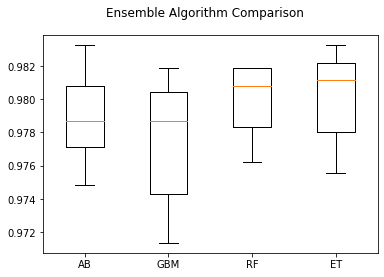

In [28]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Seems we were able to squeeze out just a little better performance using our bagging methods. `ExtraTrees` is a teensy bit more accurate than `RandomForest`, but `RandomForest` is tighter in deviation. My gut tells me `RandomForest` will perform better on unseen data because of this. 

In [29]:
# prepare the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = RandomForestClassifier(n_estimators=100)

model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9776536312849162
[[3207   27]
 [  53  293]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      3234
         1.0       0.92      0.85      0.88       346

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



The accuracy of `RandomForest` dropped a little bit from 98.00% accurate to 97.77%, but this is not bad at all considering it's only a 0.23% difference on unseen data. This means it should perform consistently well as new data comes in.

## Summary

`RandomForest` looked like the most accurate model (97.77%) for predicting whether a given sample describes a pulsar. Given that I used only the default `n_estimators`=100 paramter, I do have the option of tuning `RandomForest` for even more accuracy. I have a feeling optimizing its parameters may overfit the data, but it can be worth a shot in the future.

### Next Steps

One thing I didn't try in this project was to perform some clustering algorithms to see if we can expose the underlying structure of the data. It would be great to find insight just by visualizing how the star data clusters on itself.

I can also try doing feature selection or any form of feature engineering; the correlation plots show that there is a bit of underlying dependence between some of the features, so extracting only the more useful features may help cut down on noise.

I also have the option to optimize `RandomForest` on the training set. However, for better indication of accuracy on unseen data, I'd want to use a completely new, test data set. For example, I can look for more HTRU data for testing and validation. 

It may also be worth testing deep learning models like Neural Networks to see if we can squeeze even more accuracy, but given that these more complex models are more sensitive to noise, this sparse dataset may induce an over-fit amount of accuracy, or even worse accuracy due to the low pulsar to non-pulsar ratio.

With all that said, as in the No Free Lunch Theorem, I shouldn't be making any assumptions, so trying any of the steps above might produce interesting results.

### Conclusion

I'm really just excited that I was able to perform machine learning on astronmical data. The universe is endlessly fascinating, and the story of our cosmological past and future is hidden in the the universe's elegant patterns. I hope this project serves to show the different possibilities of what we can learn with machine learning. And maybe, just maybe, I'm now one step closer to becoming an astronaut.